In [122]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '230724_Radial_theta9_Data'
dataname = data+'230814_05'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:29]
SensorData1 = SD1

In [123]:
SD1

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx19,Sx20,Sx21,Sx22,Sx23,Force,encoder,z,theta,r
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.88,57.66,0,0,1.6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.76,57.66,0,0,1.6
2,48,39,47,49,81,51,64,51,51,48,...,49,44,39,54,54,21.66,57.66,0,0,1.6
3,48,40,48,50,84,51,65,51,53,51,...,49,44,42,58,55,21.53,57.66,0,0,1.6
4,49,42,48,50,84,52,65,52,53,51,...,49,45,42,59,55,21.51,57.66,0,0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36671,48,45,47,49,87,53,66,49,57,53,...,51,48,42,64,50,126.28,208.65,0,39,8.0
36672,47,45,47,49,87,53,66,49,59,53,...,51,47,42,64,50,126.23,208.65,0,39,8.0
36673,47,45,48,49,87,53,66,50,57,53,...,51,47,42,63,50,126.21,208.65,0,39,8.0
36674,45,45,48,49,87,53,66,50,60,52,...,51,47,43,63,51,126.12,208.65,0,39,8.0


In [124]:
SDreal = SD1

In [125]:
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx19,Sx20,Sx21,Sx22,Sx23,Force,encoder,z,theta,r
count,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,...,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.0,36676.000000,36676.000000
mean,47.661604,44.040081,45.347721,50.313229,82.016932,49.509379,63.117297,47.358709,53.815492,51.870460,...,50.263769,45.900180,42.297552,60.572282,48.553823,51.119378,13.122277,0.0,19.475106,4.798909
std,7.073121,6.606916,6.703417,7.378547,11.798125,7.390249,9.356345,7.001176,8.023069,7.814962,...,7.357484,6.720976,6.347879,8.770381,7.201876,39.788412,95.278041,0.0,11.536285,2.065498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-483.760000,-150.210000,0.0,0.000000,1.600000
25%,48.000000,44.000000,45.000000,50.000000,83.000000,49.000000,63.000000,47.000000,54.000000,52.000000,...,50.000000,46.000000,42.000000,61.000000,48.000000,14.972500,-60.560000,0.0,9.000000,3.200000
50%,49.000000,45.000000,46.000000,51.000000,84.000000,51.000000,65.000000,48.000000,55.000000,53.000000,...,51.000000,47.000000,43.000000,62.000000,50.000000,49.290000,-20.130000,0.0,19.000000,4.800000
75%,50.000000,46.000000,47.000000,53.000000,85.000000,52.000000,66.000000,49.000000,56.000000,54.000000,...,52.000000,48.000000,45.000000,63.000000,51.000000,84.120000,84.020000,0.0,29.000000,6.400000
max,55.000000,53.000000,55.000000,59.000000,90.000000,58.000000,73.000000,56.000000,62.000000,60.000000,...,57.000000,54.000000,50.000000,69.000000,57.000000,142.780000,217.970000,0.0,39.000000,8.000000


In [126]:
# SDreal 값이 0보다 작은데 encoder 인 것 제거
SDreal = SDreal[~((SDreal < 0)&(SDreal.columns != "encoder")).any(axis=1)]

# SDreal 값이 100보다 크거나 0인데, 'theta', 'z', 'Force' 열이 아닌 것 제거
SDreal = SDreal[~(((SDreal >= 100)|(SDreal == 0) ) & 
                 (SDreal.columns != "theta") &
                 (SDreal.columns != "z") &
                 (SDreal.columns != "Force") &
                  (SDreal.columns != "encoder")).any(axis=1)]

# SDreal 값이 8191이거나 8190인 것 제거
SDreal = SDreal[~((SDreal == 8191) | (SDreal == 8190)).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

SDreal = SDreal[~((SDreal >= 800) & (SDreal.columns == "Force")).any(axis=1)]
SDreal = SDreal[~((SDreal <= -300) & (SDreal.columns == "Force")).any(axis=1)]

SDreal = SDreal[SDreal["r"] >= 0.8*2]
SDreal['theta'] *=9
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx19,Sx20,Sx21,Sx22,Sx23,Force,encoder,z,theta,r
count,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,...,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.0,31269.000000,31269.000000
mean,48.572292,44.944993,46.277911,51.334293,83.707666,50.505453,64.320637,48.314433,54.859254,52.855800,...,51.316224,46.844319,43.148901,61.801593,49.540439,59.377353,11.597269,0.0,171.326681,5.233810
std,2.233204,2.221499,2.000391,1.992796,2.176746,2.488289,2.936262,2.116237,2.663639,2.838477,...,1.951054,1.760676,2.161959,1.920872,2.220352,35.366722,98.202750,0.0,107.217613,1.851608
min,35.000000,33.000000,35.000000,39.000000,70.000000,37.000000,47.000000,36.000000,38.000000,36.000000,...,38.000000,36.000000,32.000000,50.000000,37.000000,0.010000,-150.210000,0.0,0.000000,1.600000
25%,48.000000,44.000000,45.000000,50.000000,83.000000,50.000000,63.000000,47.000000,54.000000,52.000000,...,50.000000,46.000000,42.000000,61.000000,48.000000,28.460000,-61.260000,0.0,72.000000,4.000000
50%,49.000000,45.000000,46.000000,51.000000,84.000000,51.000000,65.000000,48.000000,55.000000,53.000000,...,52.000000,47.000000,43.000000,62.000000,50.000000,58.670000,-26.100000,0.0,171.000000,5.600000
75%,50.000000,46.000000,47.000000,53.000000,85.000000,52.000000,66.000000,50.000000,56.000000,55.000000,...,53.000000,48.000000,45.000000,63.000000,51.000000,88.160000,84.020000,0.0,270.000000,7.200000
max,55.000000,53.000000,55.000000,59.000000,90.000000,58.000000,73.000000,56.000000,62.000000,60.000000,...,57.000000,54.000000,50.000000,69.000000,57.000000,140.700000,217.970000,0.0,351.000000,8.000000


In [127]:
def normalize_dataframe(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / (df[column].max() - df[column].min()) * 2
    return df


#SDreal_normalized = normalize_dataframe(SDreal)
SDreal_normalized = normalize_dataframe(SDreal, ['r', 'Force'])
SDreal = SDreal_normalized

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad*2)
#SD['cos'] = (SD['cos']-SD['cos'].mean())/(SD['cos'].max()-SD['cos'].min())*2
SDreal['sin']=np.sin(SDreal['theta']*toRad*2)

SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx21,Sx22,Sx23,Force,encoder,z,theta,r,cos,sin
count,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,31269.000000,...,31269.000000,31269.000000,31269.000000,3.126900e+04,31269.000000,31269.0,31269.000000,3.126900e+04,3.126900e+04,31269.000000
mean,48.572292,44.944993,46.277911,51.334293,83.707666,50.505453,64.320637,48.314433,54.859254,52.855800,...,43.148901,61.801593,49.540439,-2.395513e-15,11.597269,0.0,171.326681,2.197351e-14,3.360035e-02,0.007010
std,2.233204,2.221499,2.000391,1.992796,2.176746,2.488289,2.936262,2.116237,2.663639,2.838477,...,2.161959,1.920872,2.220352,5.027610e-01,98.202750,0.0,107.217613,5.786276e-01,7.075888e-01,0.705813
min,35.000000,33.000000,35.000000,39.000000,70.000000,37.000000,47.000000,36.000000,38.000000,36.000000,...,32.000000,50.000000,37.000000,-8.439456e-01,-150.210000,0.0,0.000000,-1.135566e+00,-1.000000e+00,-1.000000
25%,48.000000,44.000000,45.000000,50.000000,83.000000,50.000000,63.000000,47.000000,54.000000,52.000000,...,42.000000,61.000000,48.000000,-4.395103e-01,-61.260000,0.0,72.000000,-3.855656e-01,-5.877853e-01,-0.587785
50%,49.000000,45.000000,46.000000,51.000000,84.000000,51.000000,65.000000,48.000000,55.000000,53.000000,...,43.000000,62.000000,50.000000,-1.005549e-02,-26.100000,0.0,171.000000,1.144344e-01,6.123234e-17,0.000000
75%,50.000000,46.000000,47.000000,53.000000,85.000000,52.000000,66.000000,50.000000,56.000000,55.000000,...,45.000000,63.000000,51.000000,4.091641e-01,84.020000,0.0,270.000000,6.144344e-01,8.090170e-01,0.809017
max,55.000000,53.000000,55.000000,59.000000,90.000000,58.000000,73.000000,56.000000,62.000000,60.000000,...,50.000000,69.000000,57.000000,1.156054e+00,217.970000,0.0,351.000000,8.644344e-01,1.000000e+00,1.000000


In [128]:
SDy = SDreal.iloc[:,[24,29,30]]
SDy.describe()

,Force,cos,sin
count,3.126900e+04,3.126900e+04,31269.000000
mean,-2.395513e-15,3.360035e-02,0.007010
std,5.027610e-01,7.075888e-01,0.705813
min,-8.439456e-01,-1.000000e+00,-1.000000
25%,-4.395103e-01,-5.877853e-01,-0.587785
50%,-1.005549e-02,6.123234e-17,0.000000
75%,4.091641e-01,8.090170e-01,0.809017
max,1.156054e+00,1.000000e+00,1.000000


In [129]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# SDreal.hist(bins=50, figsize=(20,15))
# plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/'+dataname+'_hist230320.png')
# plt.show()

In [131]:
X = SDreal.iloc[:,:24]
selected_cols = [col for idx, col in enumerate(X.columns) if idx % 2 == 0 ]
X = SDreal[selected_cols]
y = SDreal.iloc[:,[24,29,30]]

In [132]:
X

,Sx00,Sx02,Sx04,Sx06,Sx08,Sx10,Sx12,Sx14,Sx16,Sx18,Sx20,Sx22
2,48,47,81,64,51,59,50,45,30,38,44,54
3,48,48,84,65,53,59,51,47,33,38,44,58
4,49,48,84,65,53,59,54,48,33,38,45,59
5,48,47,83,64,53,56,51,48,32,38,44,58
6,48,45,83,63,55,55,51,48,32,38,44,54
...,...,...,...,...,...,...,...,...,...,...,...,...
36671,48,47,87,66,57,52,42,55,41,42,48,64
36672,47,47,87,66,59,52,42,53,40,42,47,64
36673,47,48,87,66,57,52,41,55,40,42,47,63
36674,45,48,87,66,60,52,41,55,38,42,47,63


In [133]:
y.sample(5)

,Force,cos,sin
36321,0.414566,9.510565e-01,-0.309017
35078,-0.236084,8.090170e-01,-0.587785
19810,-0.074310,9.510565e-01,0.309017
35156,-0.258972,8.090170e-01,-0.587785
4956,-0.071325,6.123234e-17,1.000000


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [135]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  24764 ea 79 %    X_valid:  6192 ea 19 %    X_test:  313 ea 1 %


In [136]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [137]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/230724_Radial_theta9_Data230814_05_SS.pkl']

In [138]:
from tensorflow import keras
model = keras.models.Sequential([   
    keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(8, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(3)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               3328      
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 8)                 136       
                                                                 
 dense_41 (Dense)            (None, 3)                

## Callback (best, early stopping, tensorboard)

In [139]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'230320_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [140]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [141]:
dataname

'230724_Radial_theta9_Data230814_05'

In [142]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 20
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
774/774 [==============================] - 2s 2ms/step - loss: 0.2292 - val_loss: 0.1878
Epoch 2/300
774/774 [==============================] - 1s 1ms/step - loss: 0.1711 - val_loss: 0.1730
Epoch 3/300
774/774 [==============================] - 1s 1ms/step - loss: 0.1559 - val_loss: 0.1520
Epoch 4/300
774/774 [==============================] - 1s 1ms/step - loss: 0.1459 - val_loss: 0.1636
Epoch 5/300
774/774 [==============================] - 1s 1ms/step - loss: 0.1383 - val_loss: 0.1453
Epoch 6/300
774/774 [==============================] - 1s 2ms/step - loss: 0.1334 - val_loss: 0.1451
Epoch 7/300
774/774 [==============================] - 1s 2ms/step - loss: 0.1298 - val_loss: 0.1433
Epoch 8/300
774/774 [==============================] - 1s 2ms/step - loss: 0.1253 - val_loss: 0.1469
Epoch 9/300
774/774 [==============================] - 1s 2ms/step - loss: 0.1243 - val_loss: 0.1345
Epoch 10/300
774/774 [==============================] - 1s 2ms/step - loss: 0.1219 - val_lo

In [143]:
# %load_ext tensorboard
# %tensorboard --logdir=./mylog/230320_Data --port=2322

In [144]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v1/myModel/'+dataname+'.h5')

In [145]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_cos","valid_sin"]

valid_predictions_df

194/194 [==============================] - 0s 813us/step


,valid_force,valid_cos,valid_sin
0,0.732293,0.099625,0.967891
1,0.265600,0.724364,0.845485
2,-0.423071,0.676573,-0.351646
3,-0.462362,-0.648822,-0.686064
4,0.784637,0.811987,0.655489
...,...,...,...
6187,0.532354,-0.130767,0.947973
6188,-0.411697,-0.822185,-0.578492
6189,0.406940,-0.706302,0.621438
6190,0.035019,0.330858,0.932563


In [146]:

k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
#k_df.columns  = ["force","z","r"]
#k_df.columns  = ["force","z"]
k_df.columns  = ["force","cos","sin"]
k_df.describe()

,force,cos,sin
count,6192.000000,6.192000e+03,6192.000000
mean,-0.004946,3.455095e-02,-0.003067
std,0.498388,7.096201e-01,0.703845
min,-0.843803,-1.000000e+00,-1.000000
25%,-0.437378,-5.877853e-01,-0.587785
50%,-0.004085,6.123234e-17,0.000000
75%,0.399959,8.090170e-01,0.587785
max,1.129045,1.000000e+00,1.000000


In [147]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
82.15% force
82.96% cos
82.27% sin


,force,cos,sin,valid_force,valid_cos,valid_sin
force,1.000000,0.093285,0.026799,0.821529,0.104563,0.010585
cos,0.093285,1.000000,-0.016202,0.090487,0.829635,-0.007301
sin,0.026799,-0.016202,1.000000,0.069711,-0.018381,0.822720
valid_force,0.821529,0.090487,0.069711,1.000000,0.076912,0.071496
valid_cos,0.104563,0.829635,-0.018381,0.076912,1.000000,-0.030254
valid_sin,0.010585,-0.007301,0.822720,0.071496,-0.030254,1.000000


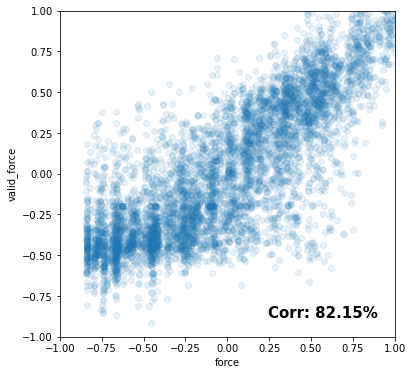

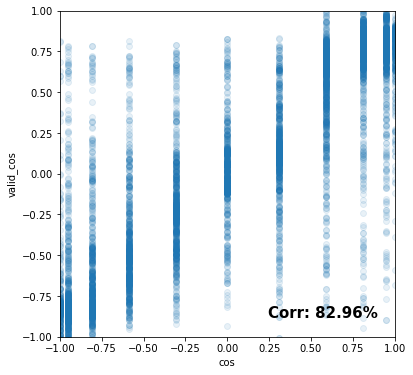

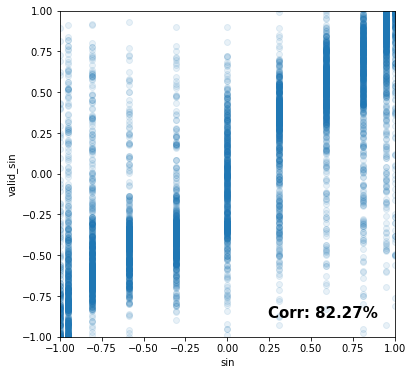

In [148]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#fields = ['z', 'force']
fields = ['force', 'cos','sin']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


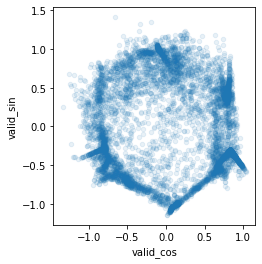

In [149]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')

# Display the plot
plt.show()


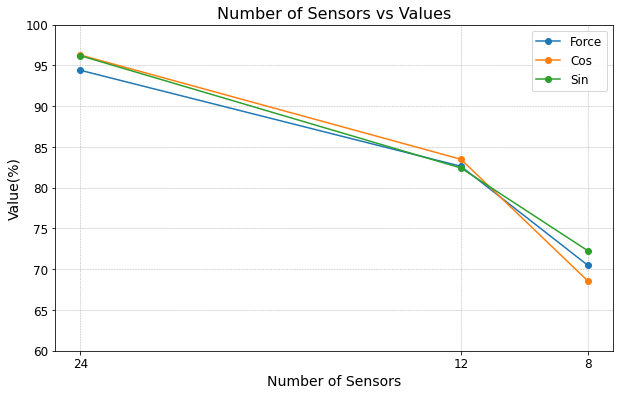

In [150]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the given data
data = {
    'Sensors': [24, 12, 8],
    'Force': [94.40, 82.63, 70.50],
    'Cos': [96.27, 83.49, 68.58],
    'Sin': [96.19, 82.42, 72.28]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10,6))

for column in ["Force", "Cos", "Sin"]:
    plt.plot(df['Sensors'], df[column], marker='o', label=column)

plt.title("Number of Sensors vs Values", fontsize=16)
plt.xlabel("Number of Sensors", fontsize=14)
plt.ylabel("Value(%)", fontsize=14)
plt.ylim(60, 100)
plt.xticks(df['Sensors'])  # This line sets the x-axis ticks to only show the specified values
plt.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label size here
plt.legend(fontsize=12)
plt.gca().invert_xaxis()  # To display 24 on the left and 6 on the right, similar to the provided data order
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
